In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string as s
from nltk.corpus import stopwords
import seaborn as sns
import re
import os
train_data=pd.read_csv("/content/test.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("/content/test.csv",header=0,names=['classid','title','desc'])


In [58]:
train_data

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [59]:
test_data

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [60]:
train_data.shape

(7600, 3)

<Axes: ylabel='count'>

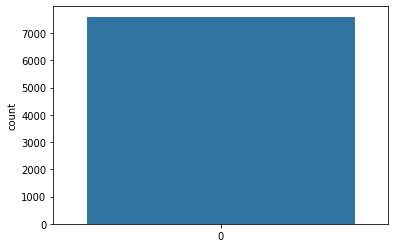

In [63]:
sns.countplot(train_data.classid)

<Axes: ylabel='count'>

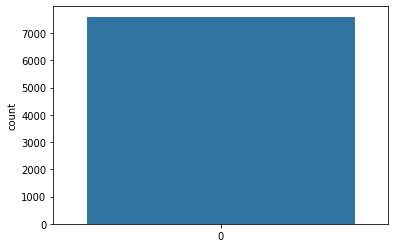

In [62]:
sns.countplot(test_data.classid)

In [64]:
# splitting the dT into input and the label

train_x=train_data.desc
test_x=train_data.desc
train_y=test_data.classid
test_y=test_data.classid


In [ ]:
# preprocessing the data

# removing the html tags
def remove_html(text):
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'',text)
train_x=train_x.apply(remove_html)
test_x=test_x.apply(remove_html)

# removing the url
def remove_url(text):
  url_pattern=re.compile(r'http?://\S+|www\.\S+')
  return url_pattern.sub(r'',text)
train_x=train_x.apply(remove_url)
test_x=test_x.apply(remove_url)


In [ ]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
def word_tokenize(txt):
    tokens = re.findall("[\w']+", txt)
    return tokens
train_x=train_x.apply(word_tokenize)
test_x=test_x.apply(word_tokenize)

In [ ]:
train_x

In [ ]:
# removing the stop words
def remove_words(text):
  stop=stopwords.words('english')
  new_list=[]
  for i in text:
    if i.lower() not in stop:
      new_list.append(i)
  return new_list
train_x=train_x.apply(remove_words)
test_x=test_x.apply(remove_words)

In [ ]:
train_x

In [ ]:
# removal of punctuation
def remove_punctuation(text):
  a=[]
  for i in text:
    for j in s.punctuation:
      i=i.replace(j,'')
    a.append(i)
  return a
train_x=train_x.apply(remove_punctuation)
test_x=test_x.apply(remove_punctuation)


In [ ]:
train_x

In [ ]:
# removal of number:
def remove_numbers(text):
  a=[]
  b=[]
  for i in text:
    for j in s.digits:
      i=i.replace(j,'')
    a.append(i)
  for i in a:
    if i!='':
      b.append(i)
    return b
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

In [ ]:

# stemming
def stemming(text):
  porter_stemmer=nltk.PorterStemmer()
  roots=[porter_stemmer.stem(each) for each in text]
  return roots
train_x=train_x.apply(stemming)
test_x=test_x.apply(stemming)

In [ ]:
train_x

In [ ]:
# lemmitization
b=nltk.stem.WordNetLemmatizer()
def lemmitzer(text):
  new_lst=[]
  for i in text:
    i=b.lemmatize(i)
    new_lst.append(i)
  return new_lst

train_x=train_x.apply(lemmitzer)
test_x=test_x.apply(lemmitzer)

In [ ]:
def remove_extrawords(lst):
    stop=['href','lt','gt','ii','iii','ie','quot','com']
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_extrawords)
test_x=test_x.apply(remove_extrawords) 

In [ ]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x)) 

In [ ]:
from sklearn.feature_extraction.text  import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=8,ngram_range=(1,3))
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)
print("No. of features extracted")
print(len(tfidf.get_feature_names_out()))
print(tfidf.get_feature_names_out()[:100])

train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
138
['afp' 'although' 'america' 'american' 'ap' 'appl' 'arsen' 'athen'
 'atlanta' 'australia' 'australian' 'baghdad' 'beij' 'boe' 'boston'
 'britain' 'british' 'brussel' 'busi' 'canadian' 'chicago' 'china' 'cisco'
 'cleveland' 'compani' 'comput' 'consum' 'crude' 'david' 'descript'
 'despit' 'detroit' 'england' 'european' 'feder' 'first' 'former' 'four'
 'french' 'gaza' 'gener' 'german' 'global' 'googl' 'head' 'hewlett' 'hong'
 'houston' 'ibm' 'india' 'indianapoli' 'intel' 'intern' 'internet' 'iran'
 'iraq' 'iraqi' 'islamabad' 'isra' 'israel' 'jakarta' 'japan' 'jerusalem'
 'kabul' 'last' 'leader' 'least' 'lo' 'london' 'madrid' 'major' 'manchest'
 'mani' 'miami' 'michael' 'microsoft' 'moscow' 'move' 'najaf' 'nasa'
 'nation' 'new' 'newcastl' 'newsfactor' 'novel' 'octob' 'oil' 'olymp'
 'one' 'oracl' 'pakistan' 'pakistani' 'palestinian' 'pari' 'paul' 'pc'
 'peoplesoft' 'ppnet' 'presid' 'prime']


In [ ]:
pd.DataFrame(train_arr[:100], columns=tfidf.get_feature_names_out())

, where 1 is "World News", 2 is "Sports News", 3 is "Business News" and 4 is "Science-Technology News".



In [ ]:
%%time
from sklearn.naive_bayes  import MultinomialNB 
NB_MN=MultinomialNB(alpha=0.52)
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

In [ ]:
print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

In [ ]:
from sklearn.metrics  import f1_score,accuracy_score
print("F1 score of the model")
print(f1_score(test_y,pred,average='micro'))
print("Accuracy of the model")
print(accuracy_score(test_y,pred))
print("Accuracy of the model in percentage")
print(round(accuracy_score(test_y,pred)*100,3),"%")

F1 score of the model
0.391578947368421
Accuracy of the model
0.391578947368421
Accuracy of the model in percentage
39.158 %
